In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv('../data/data_out_example.csv')
df.columns = ['varA','varB','out']
df = df.assign(out = lambda x: x.out.replace('a',1).replace('b',-1))
df.head()

,varA,varB,out
0,95.587768,65.274144,1
1,104.097752,48.706158,1
2,140.599196,89.274151,1
3,102.996050,137.930811,1
4,54.909590,120.612454,1


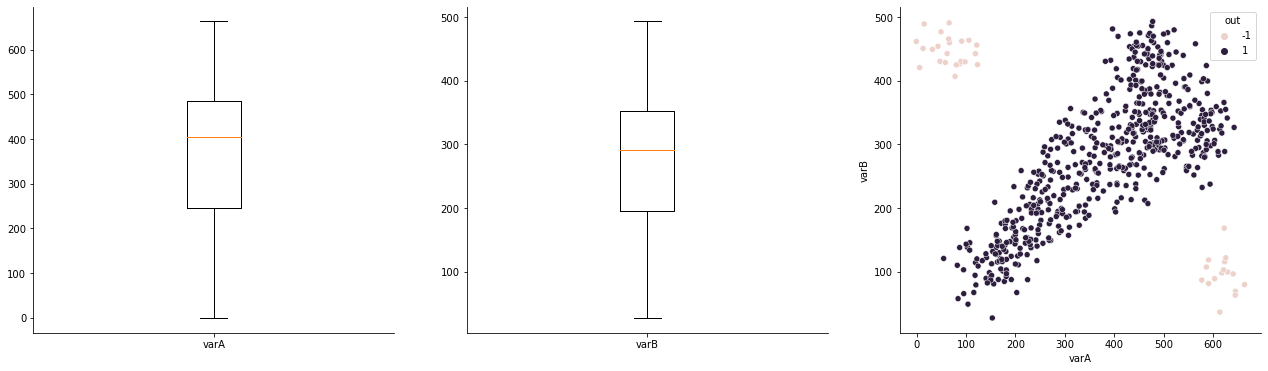

In [9]:
f ,ax = plt.subplots(1,3,figsize=(22,6))

ax[0].boxplot(df.varA)
ax[1].boxplot(df.varB)

sns.scatterplot(x='varA',y='varB',hue='out',data=df,ax=ax[2])

ax[0].set_xticklabels(['varA'])
ax[1].set_xticklabels(['varB'])
ax[2].set_xlabel('varA')
ax[2].set_ylabel('varB')

sns.despine()
plt.show()

In [10]:
pd.Series([4, 4, 5, 5, 5, 5, 7, 7, 8, 8, 10, 12]).describe()

count    12.000000
mean      6.666667
std       2.498484
min       4.000000
25%       5.000000
50%       6.000000
75%       8.000000
max      12.000000
dtype: float64

In [11]:
pd.Series([4, 4, 5, 5, 5, 5, 7, 7, 8, 8, 10, 12, 300]).describe()

count     13.000000
mean      29.230769
std       81.391189
min        4.000000
25%        5.000000
50%        7.000000
75%        8.000000
max      300.000000
dtype: float64

In [12]:
x,y = df.varA.values.reshape(-1,1), df.varB
x_no_out,y_no_out = df.query("out != -1").varA.values.reshape(-1,1),df.query("out != -1").varB

ls_data = [(x,y),(x_no_out,y_no_out)]

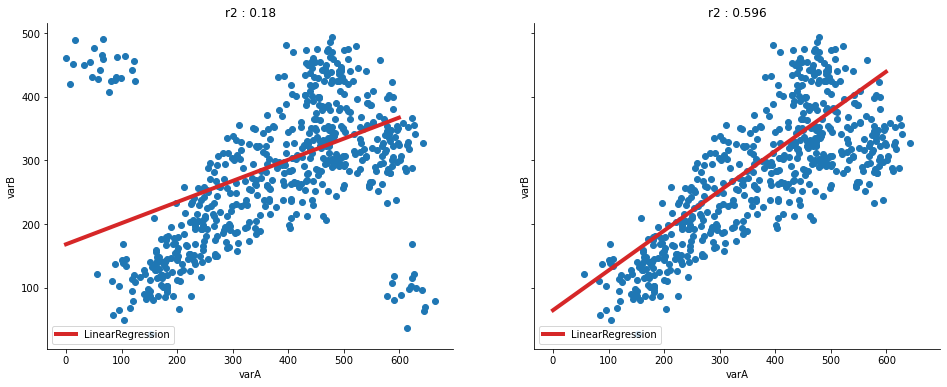

In [13]:
f, ax = plt.subplots(1,2,figsize=(16,6),sharex=True,sharey=True)
line_x = np.linspace(df.varA.min(),df.varA.max(),600).reshape(-1,1)


for i,dataset in enumerate(ls_data):
    
    x = dataset[0]
    y = dataset[1]
    
    lr = LinearRegression()
    lr.fit(x,y)

    ax[i].plot(lr.predict(line_x),color='tab:red',lw=4,label='LinearRegression')
    ax[i].scatter(x,y)
    
    ax[i].set_xlabel('varA')
    ax[i].set_ylabel('varB')
    ax[i].legend(loc=3)
    
    ax[i].set_title(f'r2 : {round(r2_score(y,lr.predict(x)),3)}')

sns.despine()

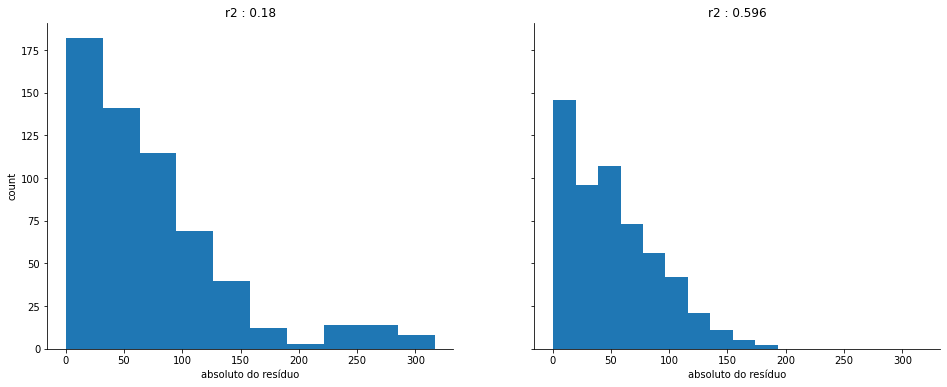

In [14]:
f, ax = plt.subplots(1,2,figsize=(16,6),sharex=True,sharey=True)

for i,dataset in enumerate(ls_data):
    
    x = dataset[0]
    y = dataset[1]
    
    lr = LinearRegression()
    lr.fit(x,y)

    ax[i].hist(np.abs(y-lr.predict(x)))
    
    ax[i].set_xlabel('absoluto do resíduo')
    
    if i == 0:
        ax[i].set_ylabel('count')
    
    ax[i].set_title(f'r2 : {round(r2_score(y,lr.predict(x)),3)}')

sns.despine()

## Isolation Forest

In [51]:
from sklearn.ensemble import IsolationForest
from mlxtend.plotting import plot_decision_regions
from sklearn import tree

In [52]:
isof = IsolationForest(n_estimators=500,contamination=0.08,random_state=42)
isof.fit(df[['varA','varB']])
out = isof.predict(df[['varA','varB']])

x_test = df[['varA','varB']].iloc[0,:].values.reshape(1,-1)

<AxesSubplot:>

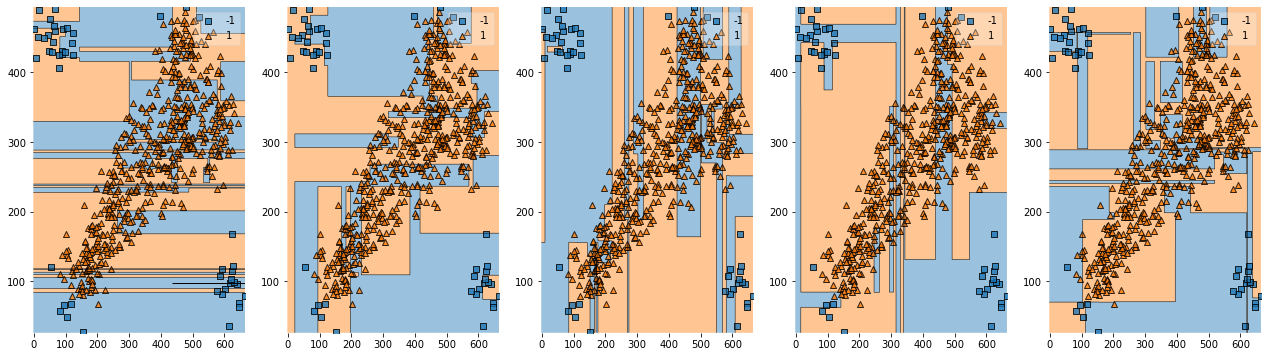

In [53]:
f ,ax = plt.subplots(1,5,figsize=(22,6))

plot_decision_regions(df[['varA','varB']].values, out, clf=isof.estimators_[0],ax=ax[0])
plot_decision_regions(df[['varA','varB']].values, out, clf=isof.estimators_[100],ax=ax[1])
plot_decision_regions(df[['varA','varB']].values, out, clf=isof.estimators_[200],ax=ax[2])
plot_decision_regions(df[['varA','varB']].values, out, clf=isof.estimators_[300],ax=ax[3])
plot_decision_regions(df[['varA','varB']].values, out, clf=isof.estimators_[400],ax=ax[4])

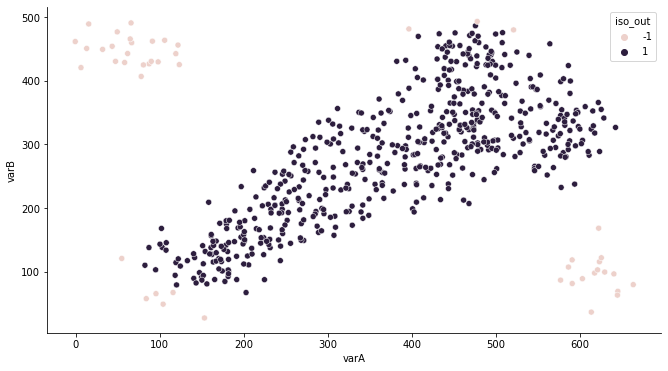

In [54]:
plt.figure(figsize=(11,6))
sns.scatterplot(x='varA',y='varB',hue='iso_out',data=df.assign(iso_out = out))
sns.despine()